<a href="https://colab.research.google.com/github/asri1204/ASRITHA/blob/main/carpriceprediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
import pandas as pd
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
# Drop columns that are not useful for prediction
df = df.drop(['car_ID', 'CarName'], axis=1)

# Convert categorical data to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the processed dataset
print(df.head())


   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  cylindernumber_three  \
0         130       3.47    2.68               9.0  ...                 False   
1         130       3.47    2.68               9.0  ...                 False   
2         152       2.68    3.47               9.0  ...                 False   
3         109       3.19    3.40              10.0  ...                 False   
4         136       3.19    3.40               8.0  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  Fa

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Build the Sequential model
model = Sequential()

# Input layer + 1st hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

# 2nd hidden layer
model.add(Dense(64, activation='relu'))

# 3rd hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (for regression)
model.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=16,
                    verbose=1)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 194198192.0000 - mae: 12339.3750 - val_loss: 363383136.0000 - val_mae: 15938.5332
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 210352560.0000 - mae: 12638.1768 - val_loss: 363276928.0000 - val_mae: 15935.7109
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 207086336.0000 - mae: 12754.5762 - val_loss: 363086944.0000 - val_mae: 15930.8457
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 227470352.0000 - mae: 12914.8262 - val_loss: 362742400.0000 - val_mae: 15922.1562
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 226905776.0000 - mae: 13126.4316 - val_loss: 362118688.0000 - val_mae: 15906.8896
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 216458528.0000 - mae: 12898.1094 - val_loss: 361036288.0000 - val_mae: 15880.8975
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 212467408.0000 - mae: 12916.7959 - val_loss: 359130464.0000 - val_mae: 15836.0713
Epoch 8/100

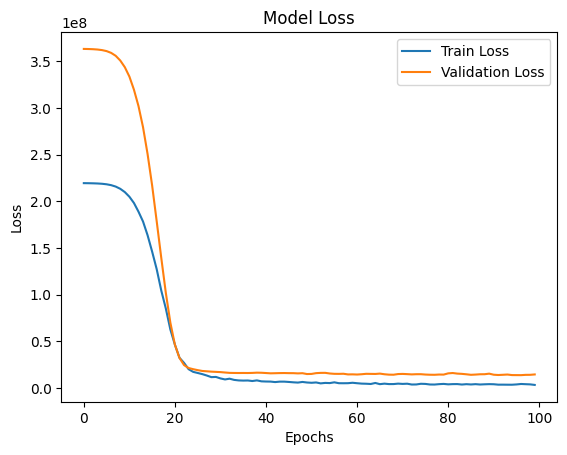

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error: {mae:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9476107.0000 - mae: 2067.4026

Test Mean Absolute Error: 2048.71


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare first 5 predictions
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted: 27569.78, Actual: 30760.00
Predicted: 16647.09, Actual: 17859.17
Predicted: 8057.70, Actual: 9549.00
Predicted: 14461.97, Actual: 11850.00
Predicted: 25254.55, Actual: 28248.00


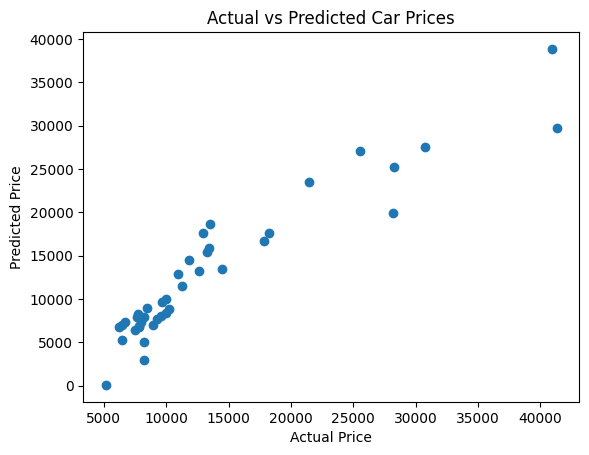

In [ ]:
# Plot Actual vs Predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
